In [1]:
from lstm_creator import createLstmModelFromDatasets, scaleData, preprocessData
from predict_next_value import predict_next, load_x_from_file
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# register_matplotlib_converters()

In [2]:
lookback_length = 60
sample_every_x = 240

paths = ["../../../data/MorningTest.csv", "../../../data/MorningTest5.csv", "../../../data/MorningTest6.csv", "../../../data/MorningTest10.csv"]
model = createLstmModelFromDatasets(paths, lookback_length, sample_every_x)

# live_data = load_x_from_file("../../../data/MorningTest2.csv", lookback_length)
# next_value = predict_next(model, live_data)
# print(next_value)

Epoch 1/48
1/1 [==============================] - 3s 3s/step - loss: 0.1388
Epoch 2/48
1/1 [==============================] - 0s 53ms/step - loss: 0.1000
Epoch 3/48
1/1 [==============================] - 0s 52ms/step - loss: 0.0652
Epoch 4/48
1/1 [==============================] - 0s 49ms/step - loss: 0.0366
Epoch 5/48
1/1 [==============================] - 0s 49ms/step - loss: 0.0213
Epoch 6/48
1/1 [==============================] - 0s 50ms/step - loss: 0.0222
Epoch 7/48
1/1 [==============================] - 0s 47ms/step - loss: 0.0353
Epoch 8/48
1/1 [==============================] - 0s 49ms/step - loss: 0.0385
Epoch 9/48
1/1 [==============================] - 0s 48ms/step - loss: 0.0360
Epoch 10/48
1/1 [==============================] - 0s 50ms/step - loss: 0.0305
Epoch 11/48
1/1 [==============================] - 0s 51ms/step - loss: 0.0232
Epoch 12/48
1/1 [==============================] - 0s 46ms/step - loss: 0.0209
Epoch 13/48
1/1 [==============================] - 0s 47ms/step

# Testing

In [6]:
def evaluate_model(real_data, predicted_data, inherent_loss=2):
    slope_to_buy_at = .23

    real_data = real_data.reshape(len(real_data))
    predicted_data = predicted_data.reshape(len(predicted_data))

    real_diff = np.diff(real_data)
    predicted_diff = np.diff(predicted_data)

    correct_slopes = 0
    profit = 0
    for i in range(len(real_data)-1):
        if np.sign(real_diff[i]) == np.sign(predicted_diff[i]):
            correct_slopes = correct_slopes + 1
            
            # If we have a positive slope calculate profit
            if real_diff[i] > slope_to_buy_at:
                # we subtract inherent_loss due to the limit market mechanics
                revenue = (real_data[i+1] - real_data[i]) - inherent_loss
                if revenue > 0:
                    print(f"Found a profit where current value is {real_data[i+1]} last was {real_data[i]} net {revenue}")
                    profit = profit + revenue

        else:
            # We guessed wrong
            if predicted_diff[i] > slope_to_buy_at:
                # we would have bought
                revenue = (real_data[i+1] - real_data[i]) - inherent_loss
                print(f"Selling at a loss of {revenue}")
                profit = profit + revenue

    return (correct_slopes, profit)

def eval_model_on_dataset(actual, prediction, subsampling, inherent_loss):
    # Determine the number of cases in which we predicted a correct increase
    correct_slopes, profit = evaluate_model(actual, prediction, inherent_loss)

    print(f"Found {correct_slopes} out of {len(actual)-1}")
    precent_success = (correct_slopes/(len(actual)-1)) * 100
    print(f"{precent_success}%")
    print("Profit:", profit)
    return profit

In [7]:
def testModel(model, length, path_to_testing_dataset, quiet=False):

    datasets, scaler = scaleData([path_to_testing_dataset], 1)

    hist, actual = preprocessData(datasets[0], length)

    pred = model.predict(hist)

    pred_transformed = scaler.inverse_transform(pred)
    actual_transformed = scaler.inverse_transform(actual)

    if not quiet:
        plt.figure(figsize=(12,8))
        plt.plot(actual_transformed, color='blue', label='Real')
        plt.plot(pred_transformed, color='red', label='Prediction')
        plt.title('ETH Price Prediction')
        plt.legend()
        plt.show()

    return eval_model_on_dataset(actual=actual_transformed, prediction=pred_transformed, subsampling=1, inherent_loss=1.5)

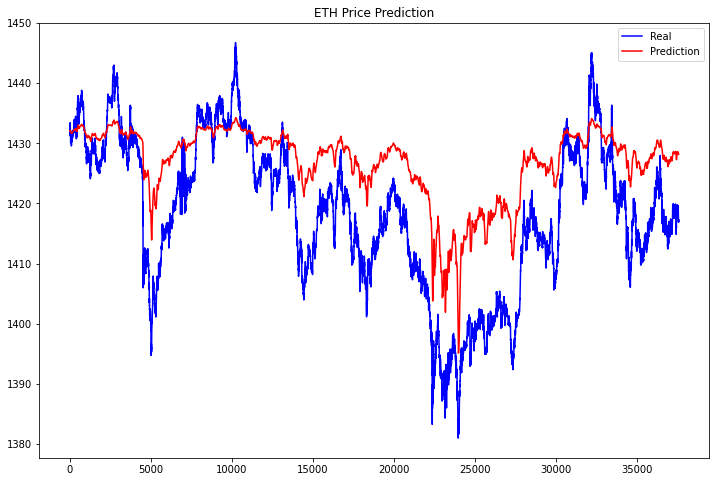

Found a profit where current value is 1432.901937 last was 1431.109007 net 0.2929300000000694
Found a profit where current value is 1407.928402 last was 1405.758762 net 0.6696400000000722
Found a profit where current value is 1422.935 last was 1418.845 net 2.589999999999918
Found a profit where current value is 1424.09 last was 1419.055 net 3.5349999999998545
Found a profit where current value is 1425.25 last was 1421.135 net 2.615000000000009
Found a profit where current value is 1426.02 last was 1421.94 net 2.5799999999999272
Found a profit where current value is 1431.01 last was 1426.365 net 3.144999999999982
Found a profit where current value is 1430.25 last was 1425.98 net 2.769999999999982
Found a profit where current value is 1429.715 last was 1426.02 net 2.1949999999999363
Found a profit where current value is 1425.56 last was 1421.565 net 2.494999999999891
Found a profit where current value is 1424.495 last was 1420.295 net 2.699999999999818
Found a profit where current value 

27.55676500000004

In [8]:
testModel(model, lookback_length, "../../../data/MorningTest8.csv")